# Exploratory Analysis - Bike Sharing

- **Data source:** [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset).
- The database used in this notebook will be hourly, (hour.csv).

Reference: Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

## Import Packages

In [1]:
import numpy as np
import pandas as pd

# plotting
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

# setting params
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

sn.set_style('whitegrid')
sn.set_context('talk')

plt.rcParams.update(params)


## Load Dataset

In [2]:
df = pd.read_csv('Data\hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
# Number of rows and columns
df.shape

(17379, 17)

## Transform data

In [4]:
# data types
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [5]:
# standardizing attribute names
df.rename(columns={'instant': 'id',
                  'dteday': 'datetime',
                  'holiday':'is_holiday',
                  'workingday':'is_workingday',
                  'weathersit':'weather_condition',
                  'hum':'humidity',
                  'mnth':'month',
                  'cnt':'total_count',
                  'hr':'hour',
                  'yr':'year'},inplace=True)

In [6]:
# date time conversion
df['datetime'] = pd.to_datetime(df.datetime)

# categorical variables
df['season'] = df.season.astype('category')
df['is_holiday'] = df.is_holiday.astype('category')
df['weekday'] = df.weekday.astype('category')
df['weather_condition'] = df.weather_condition.astype('category')
df['is_workingday'] = df.is_workingday.astype('category')
df['month'] = df.month.astype('category')
df['year'] = df.year.astype('category')
df['hour'] = df.hour.astype('category')

In [7]:
# Querying rows with missing values
df.isnull().sum()

id                   0
datetime             0
season               0
year                 0
month                0
hour                 0
is_holiday           0
weekday              0
is_workingday        0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

## Visualize Attributes

### analyzing the bike rental in the collected period

Text(0, 0.5, 'Count')

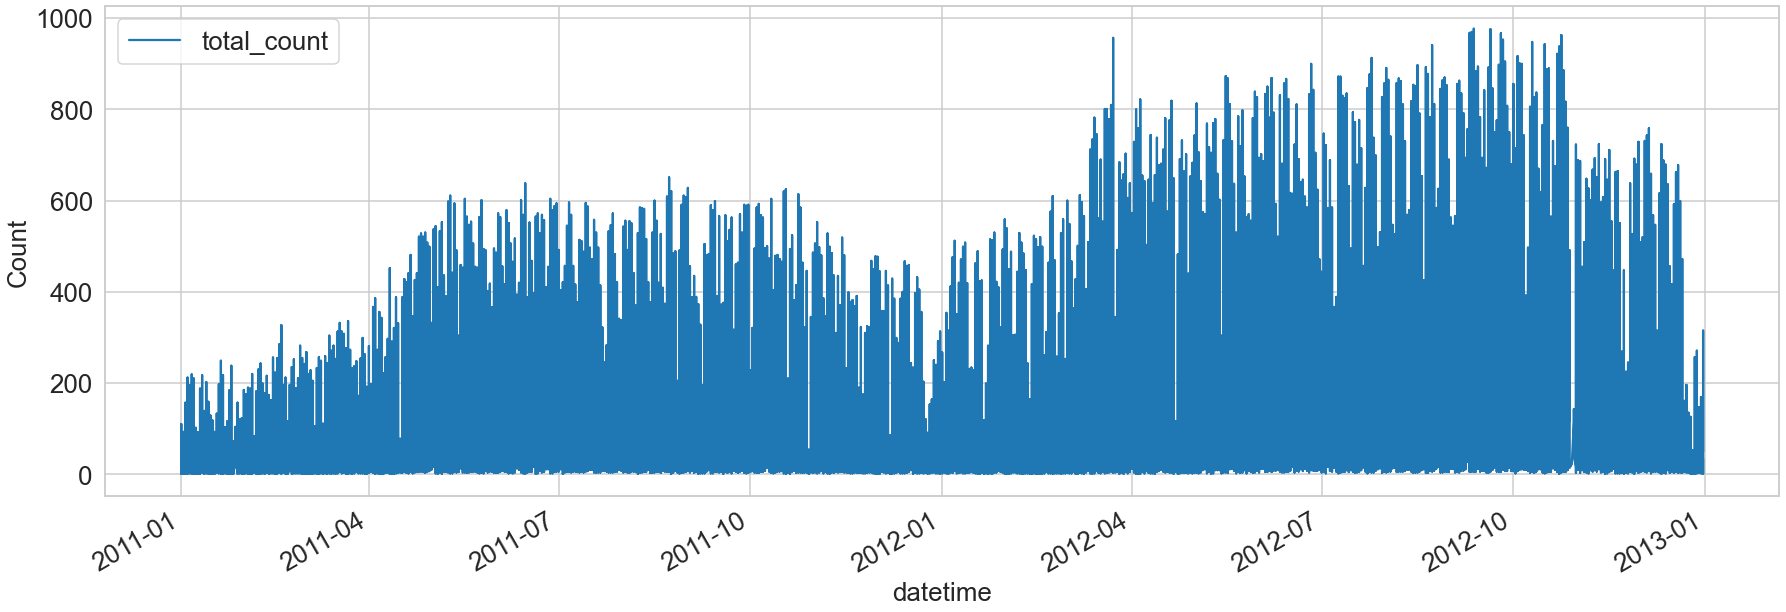

In [8]:

df.plot(x='datetime', y='total_count')
plt.ylabel('Count')


 - There was a considerable increase in bicycle rentals in Washington DC in the year 2012, compared with the previous year. 

### Season distribution of total counts

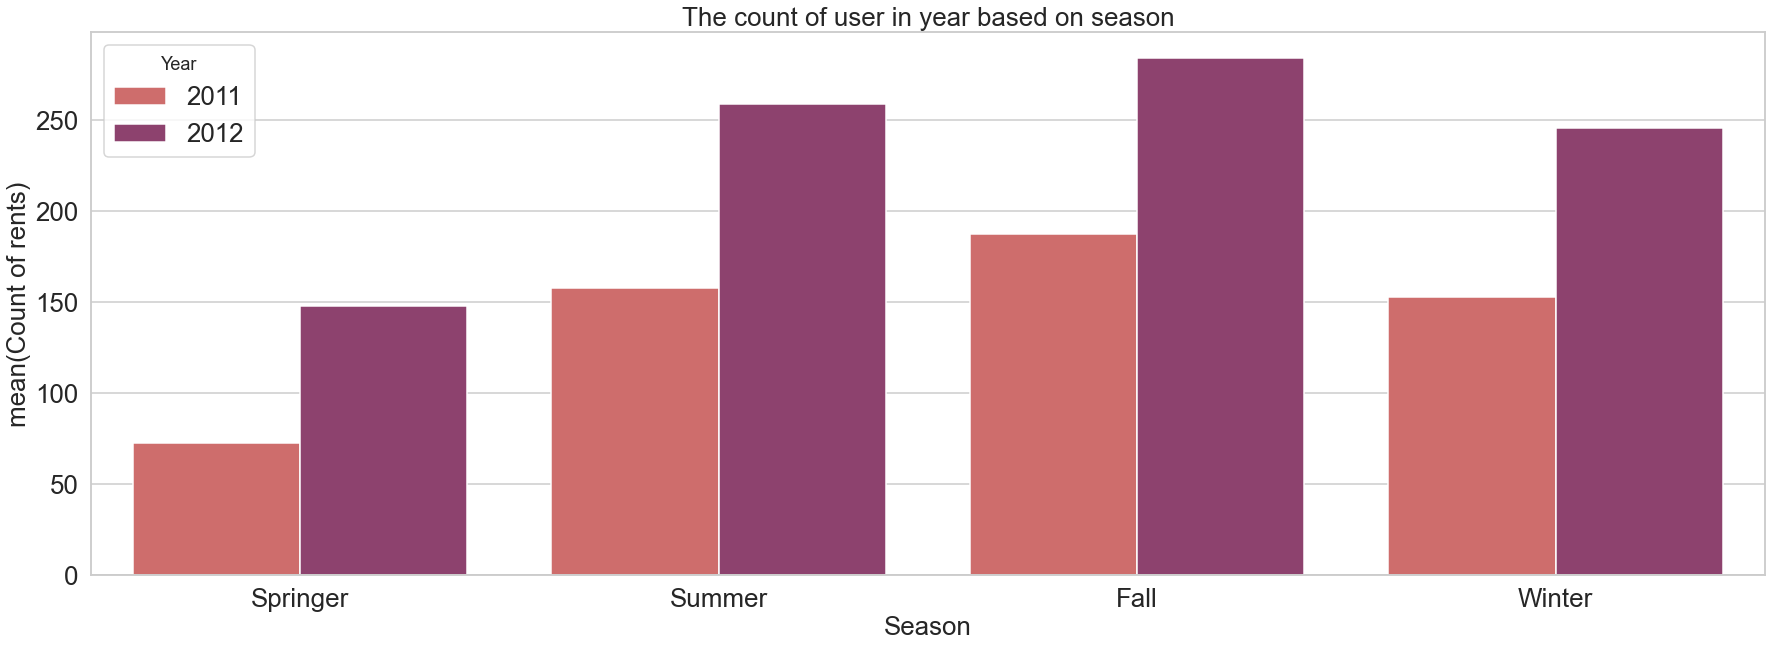

In [9]:
fig, ax = plt.subplots()
sn.barplot(data=df,x="season",  y="total_count", hue="year", palette="flare", ci=None)

plt.ylabel('mean(Count of rents)')
plt.xlabel('Season')
plt.title("The count of user in year based on season")

plt.xticks([0,1,2,3],['Springer', 'Summer', 'Fall', 'Winter'])

year_labels = ['2011', '2012']

plt.legend(title='Year', loc='best', labels=year_labels)



- the number of rents increse on fall
- spring is the season with the lowest rents on average

### Hourly distribution of Total Counts

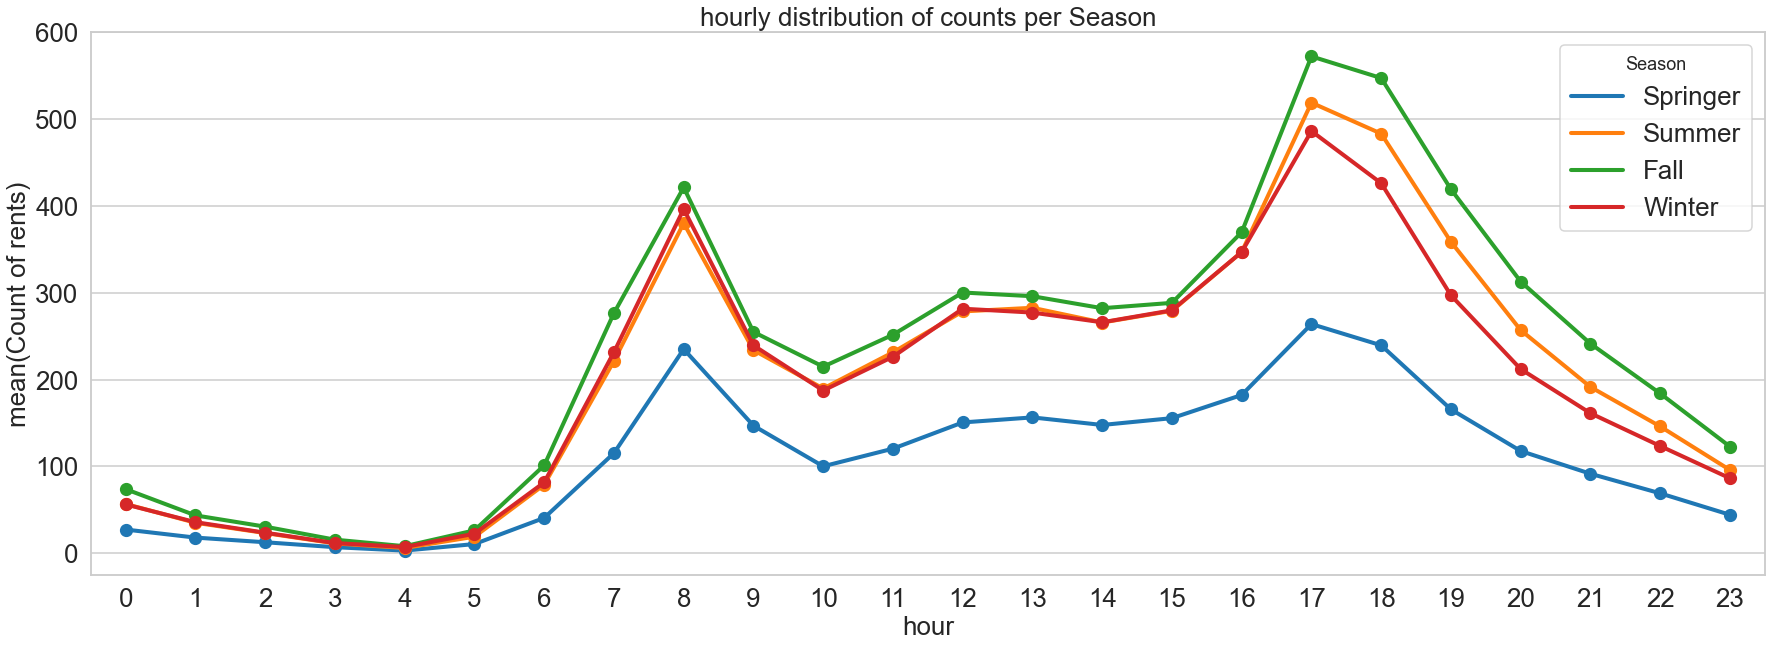

In [10]:
fig,ax = plt.subplots()
sn.pointplot(data=df[['hour',
                    'total_count',
                    'season']],
             x='hour',y='total_count',
             hue='season',ax=ax, ci =None)
ax.set(title="hourly distribution of counts per Season", ylabel = 'mean(Count of rents)')

ax.legend(title='Season', loc='best', labels=['Springer', 'Summer', 'Fall', 'Winter'])


- The above plot shows peaks around 8am (8 hour) and 5pm (17 hour), entering and exiting office hours
- Overall higher usage in the second half of the day

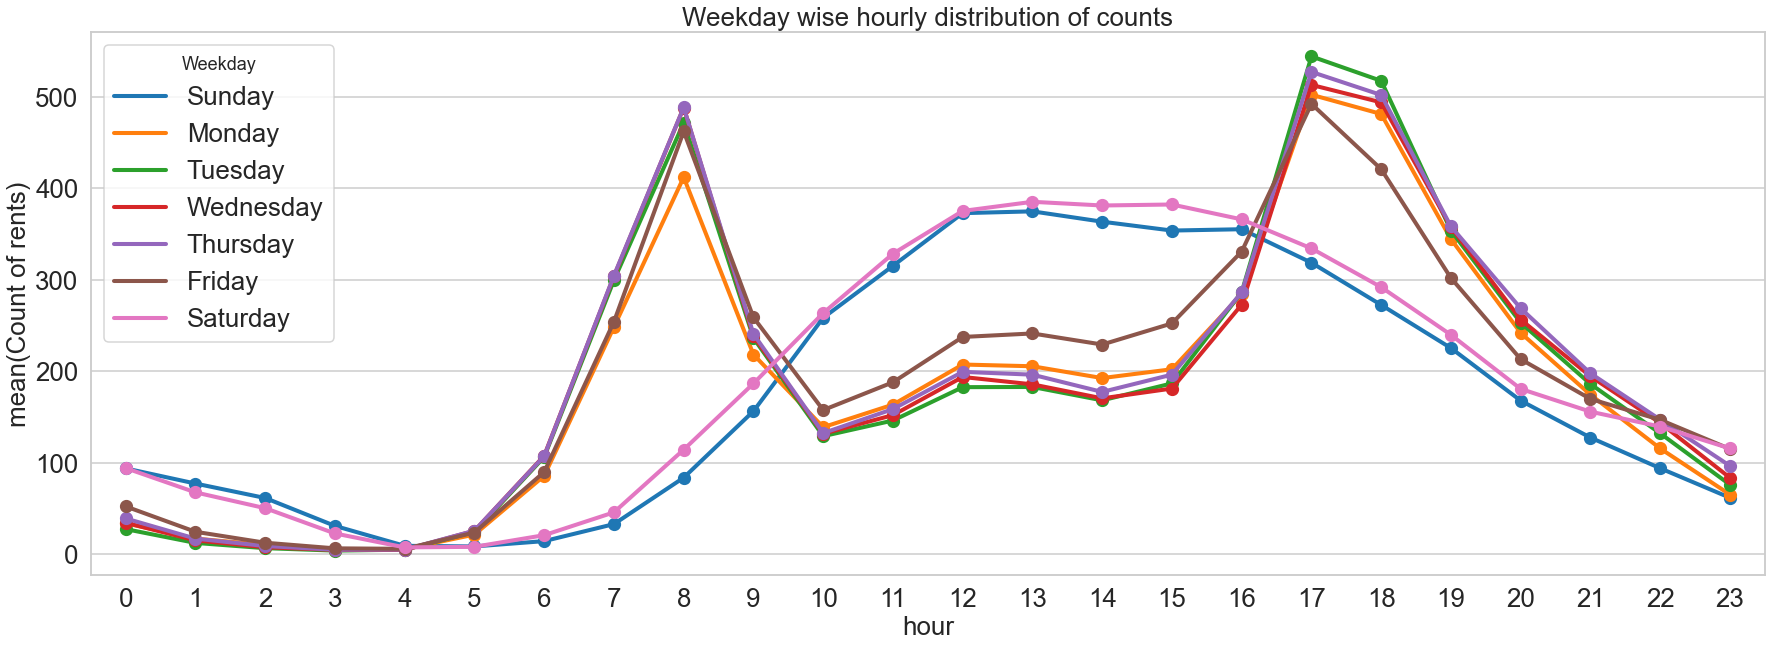

In [11]:
fig,ax = plt.subplots()
sn.pointplot(data=df[['hour','total_count','weekday']],x='hour',y='total_count',hue='weekday',ax=ax, ci =None)

ax.set(title="Weekday wise hourly distribution of counts", ylabel = 'mean(Count of rents)')
ax.legend(title='Weekday', loc='best', labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

- Weekends and Weekdays show different usage trends with weekend's peak usage in during afternoon hours.
- Weekdays follow the overall trend, similar to one visualized in the previous plot.
- Weekdays have higher usage as compared to weekends.

[Text(0.5, 1.0, 'Box Pot for hourly distribution of counts')]

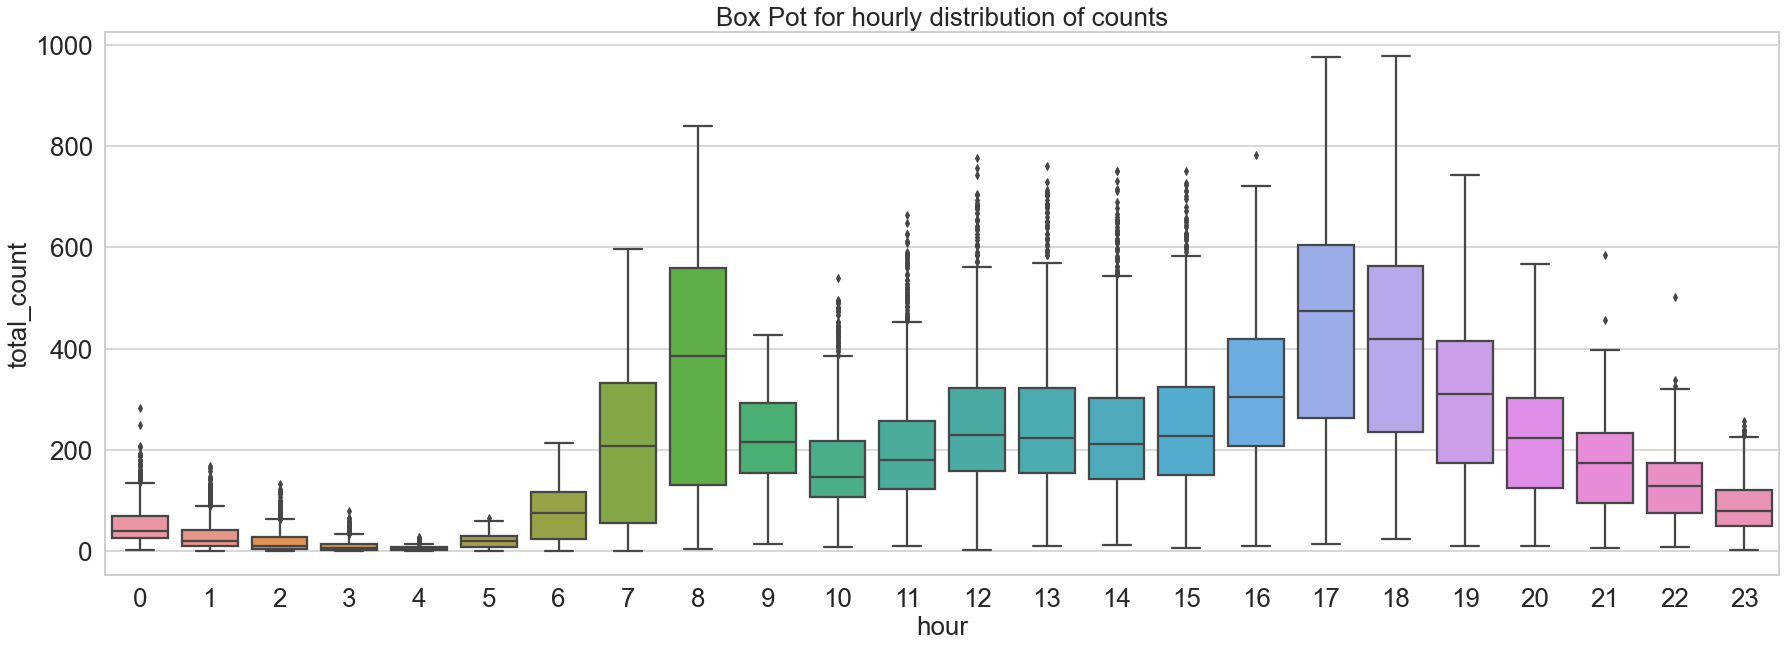

In [12]:
fig,ax = plt.subplots()
sn.boxplot(data=df[['hour','total_count']],x="hour",y="total_count",ax=ax)
ax.set(title="Box Pot for hourly distribution of counts")

- Early hours (0-4) and late nights (21-23) have low counts but significant outliers, Afternoon hours also have outliers
- Peak hours have higher medians and overall counts with virtually no outliers

### Monthly distribution of Total Counts

[Text(0.5, 1.0, 'Monthly distribution of counts'),
 Text(0, 0.5, 'mean(Count of rents)')]

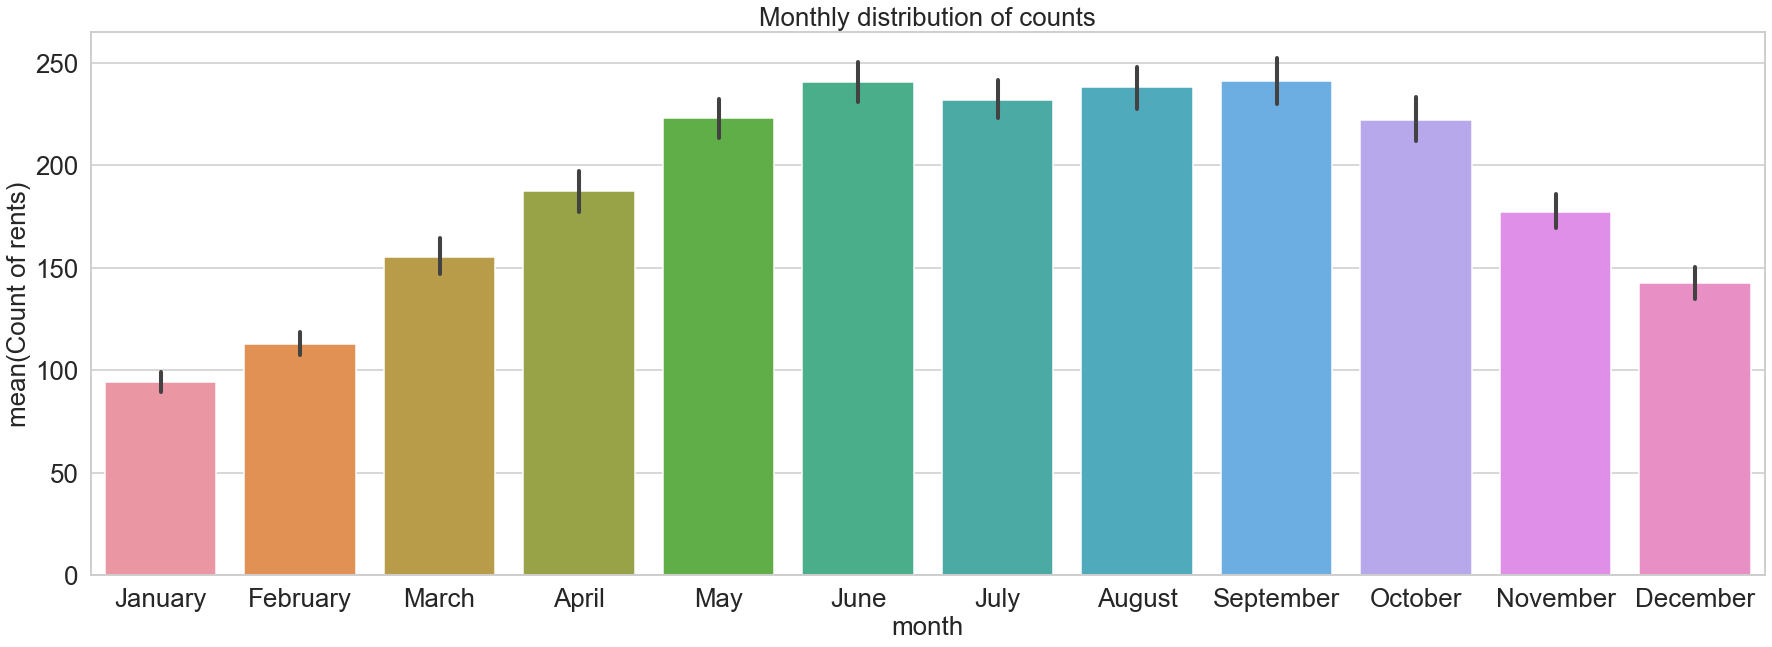

In [13]:
fig,ax = plt.subplots()
sn.barplot(data=df[['month',
                    'total_count']],
           x="month",y="total_count")

plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],
           ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

ax.set(title="Monthly distribution of counts", ylabel = 'mean(Count of rents)')



- Months June-Oct have the highest averages. As already seen in the seasonal analysis, fall seems to be the favorite time of year to use bicycles.

### Correlations

<AxesSubplot:>

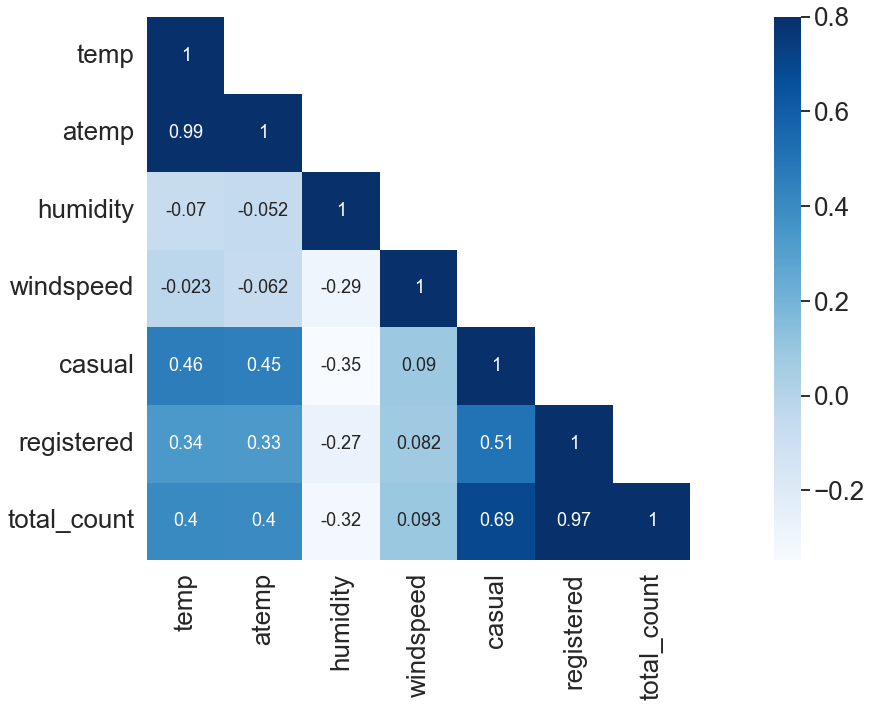

In [14]:
df_corr = df[["temp","atemp",
                    "humidity","windspeed",
                    "casual","registered",
                    "total_count"]].corr()

mask = np.array(df_corr)
mask[np.tril_indices_from(mask)] = False
sn.heatmap(df_corr,mask=mask, vmax=.8, square=True,annot=True, cmap="Blues")


- Correlation between temp and atemp is very high, as expected since one is the temperature (temp) and the other is the feeling temperature (atemp).
- Same is te case with registered-total_count and casual-total_count
- Windspeed to humidity has negative correlation
- Overall correlational statistics are not very high.